<a href="https://colab.research.google.com/github/ARKAL-J04/MachineLearning2025/blob/main/Chapter1/AI_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D  # برای رسم نمودار سه‌بعدی

#I

##آ

In [ ]:
#https://drive.google.com/file/d/1iMjo4Qa_JQUUcxmcdUV0dWRQWevb_0br/view?usp=sharing

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1iMjo4Qa_JQUUcxmcdUV0dWRQWevb_0br

Downloading...
From (original): https://drive.google.com/uc?id=1iMjo4Qa_JQUUcxmcdUV0dWRQWevb_0br
From (redirected): https://drive.google.com/uc?id=1iMjo4Qa_JQUUcxmcdUV0dWRQWevb_0br&confirm=t&uuid=4725ab81-4741-44dc-a80a-f59d2a830635
To: /content/201.mat
100% 3.92M/3.92M [00:00<00:00, 28.8MB/s]


In [ ]:
# خواندن فایل .mat
mat_data = scipy.io.loadmat("/content/201.mat")
# نمایش نوع داده‌ها
print(type(mat_data))
# نمایش کلیدهای موجود برای یافتن نام متغیرها
print(mat_data.keys())

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'X201_DE_time', 'X201_FE_time', 'X201RPM'])


In [ ]:
# فرض کنیم داده‌های اصلی در 'X109_DE_time' ذخیره شده باشند
data_array = mat_data["X201_DE_time"]  # ذخیره در متغیر

print(type(data_array))  # بررسی نوع داده
print(data_array.shape)  # نمایش ابعاد داده‌ها


<class 'numpy.ndarray'>
(245140, 1)


##ب

In [ ]:
Fs = 48000  # نرخ نمونه بردرای
T = 1 / Fs  # دوره نمونه‌برداری
N = len(data_array)  # تعداد نمونه‌ها
time = np.linspace(0, N*T, N)  # ایجاد بردار زمان


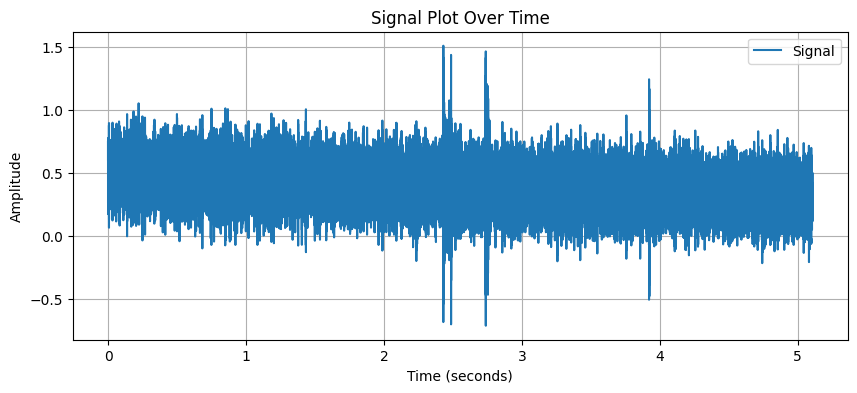

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(time, data_array, label="Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Signal Plot Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# انتخاب نقاطی که در بازه 2 تا 2.01 ثانیه هستند
mask = (time >= 2) & (time <= 2.01)  # ایجاد ماسک فیلتر
time_filtered = time[mask]  # انتخاب مقادیر مربوط به این بازه
signal_filtered = data_array[mask]  # انتخاب داده‌های سیگنال در این بازه


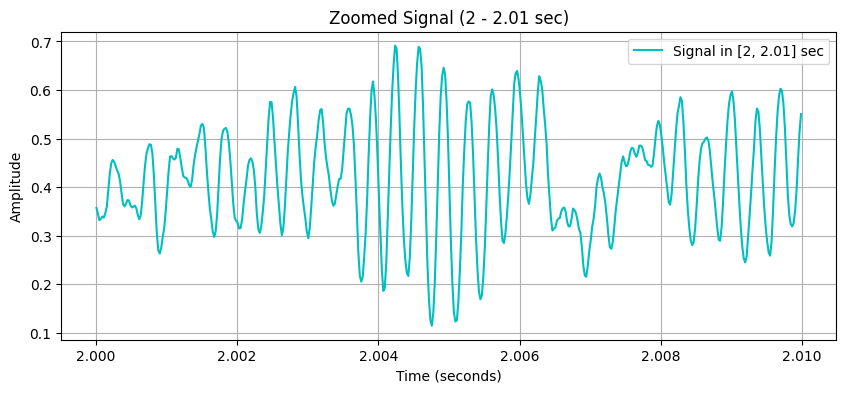

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(time_filtered, signal_filtered, label="Signal in [2, 2.01] sec", color="c")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Zoomed Signal (2 - 2.01 sec)")
plt.legend()
plt.grid(True)
plt.show()


##ج

In [ ]:
def plot_frequency_spectrum_with_dominant(signal, Fs):

    N = len(signal)  # تعداد نمونه‌ها
    fft_values = np.fft.fft(signal)  # محاسبه FFT
    fft_magnitude = np.abs(fft_values) / N  # نرمال‌سازی دامنه
    frequencies = np.fft.fftfreq(N, 1 / Fs)  # محاسبه محور فرکانسی

    # فقط بخش مثبت فرکانس‌ها را در نظر بگیریم
    half_N = N // 2
    frequencies = frequencies[:half_N]
    fft_magnitude = fft_magnitude[:half_N]

    # پیدا کردن اندیس فرکانس غالب
    dominant_index = np.argmax(fft_magnitude)
    dominant_frequency = frequencies[dominant_index]

    # رسم طیف فرکانسی
    plt.figure(figsize=(8, 4))
    plt.plot(frequencies, fft_magnitude, color='c', label="Frequency Spectrum")
    plt.axvline(x=dominant_frequency, color='m', linestyle='--', label=f"Dominant Frequency: {dominant_frequency:.2f} Hz")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title("Frequency Spectrum with Dominant Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"🔹 dominant: {dominant_frequency:.2f} Hz")


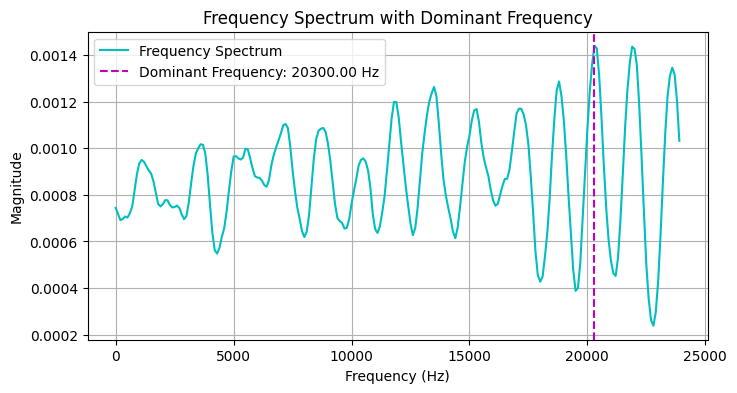

🔹 dominant: 20300.00 Hz


In [ ]:
plot_frequency_spectrum_with_dominant(signal_filtered, Fs)

##د

In [ ]:
def split_signal_with_overlap(signal, segment_size=128, overlap=32): #25% همپوشانی

    step = segment_size - overlap  # اندازه گام (با توجه به هم‌پوشانی)
    segments = []  # لیستی برای ذخیره قطعه‌ها

    # تقسیم سیگنال به قطعه‌ها با هم‌پوشانی
    for start_index in range(0, len(signal) - segment_size + 1, step):
        end_index = start_index + segment_size
        segment = signal[start_index:end_index]
        segments.append(segment)  # اضافه کردن قطعه به لیست

    return np.array(segments)  # تبدیل لیست به آرایه NumPy


In [ ]:
segments = split_signal_with_overlap(data_array, segment_size=128, overlap=32)

print(f"تعداد قطعه‌ها: {segments.shape[0]}")
print(f"ابعاد هر قطعه: {segments.shape[1]}")
print(segments)  # نمایش قطعه‌ها


تعداد قطعه‌ها: 2553
ابعاد هر قطعه: 128
[[[0.60915692]
  [0.67591385]
  [0.73098831]
  ...
  [0.43266831]
  [0.39741231]
  [0.39177969]]

 [[0.44852308]
  [0.54615508]
  [0.63606831]
  ...
  [0.48982892]
  [0.44455938]
  [0.41535323]]

 [[0.48252738]
  [0.41431015]
  [0.36632862]
  ...
  [0.56931138]
  [0.46124862]
  [0.34296369]]

 ...

 [[0.37112677]
  [0.40638277]
  [0.41827385]
  ...
  [0.38426954]
  [0.36319938]
  [0.30562154]]

 [[0.414936  ]
  [0.41013785]
  [0.39198831]
  ...
  [0.344424  ]
  [0.32877785]
  [0.32210215]]

 [[0.32314523]
  [0.32210215]
  [0.32460554]
  ...
  [0.387816  ]
  [0.36257354]
  [0.33566215]]]


##ه

In [ ]:
segments_2d = np.squeeze(segments)
df = pd.DataFrame(segments_2d)  # تبدیل آرایه به DataFrame
df


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.609157,0.675914,0.730988,0.755605,0.736204,0.676748,0.600186,0.512568,0.427662,0.357984,...,0.718889,0.715968,0.682798,0.642118,0.595388,0.541357,0.486074,0.432668,0.397412,0.391780
1,0.448523,0.546155,0.636068,0.713047,0.765618,0.780639,0.767287,0.725982,0.678000,0.614164,...,0.530718,0.587461,0.609366,0.603524,0.587252,0.570354,0.535516,0.489829,0.444559,0.415353
2,0.482527,0.414310,0.366329,0.364868,0.394909,0.447063,0.510273,0.569937,0.625846,0.678417,...,0.502346,0.590382,0.659016,0.702408,0.714299,0.693020,0.645665,0.569311,0.461249,0.342964
3,0.456033,0.426410,0.394074,0.379889,0.387190,0.432877,0.490872,0.541148,0.581411,0.600812,...,0.538436,0.505684,0.475643,0.455199,0.436841,0.416188,0.424532,0.456242,0.507978,0.565348
4,0.515697,0.468133,0.428913,0.388650,0.362782,0.350057,0.358818,0.391154,0.422446,0.442890,...,0.616041,0.539688,0.449775,0.380932,0.323354,0.288515,0.291644,0.328152,0.407426,0.502137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,0.069886,0.063836,0.080526,0.130176,0.195055,0.253676,0.327109,0.388859,0.448523,0.496922,...,0.362991,0.343798,0.321268,0.315009,0.309585,0.302284,0.290810,0.259726,0.239282,0.230729
2549,0.644830,0.632730,0.597892,0.529257,0.441847,0.349431,0.260561,0.198810,0.170230,0.171899,...,0.375925,0.328569,0.273912,0.238447,0.230103,0.239908,0.264733,0.288932,0.307916,0.337331
2550,0.371127,0.406383,0.418274,0.427453,0.416188,0.380306,0.330447,0.247209,0.186294,0.146865,...,0.341503,0.358818,0.381349,0.398664,0.397830,0.403671,0.394700,0.384270,0.363199,0.305622
2551,0.414936,0.410138,0.391988,0.367372,0.341921,0.325440,0.304996,0.284760,0.255554,0.235735,...,0.302910,0.328152,0.362365,0.375925,0.384270,0.374465,0.354438,0.344424,0.328778,0.322102


<ipython-input-18-98973cd46b08>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", num_segments)  # استفاده از رنگ‌های آماده


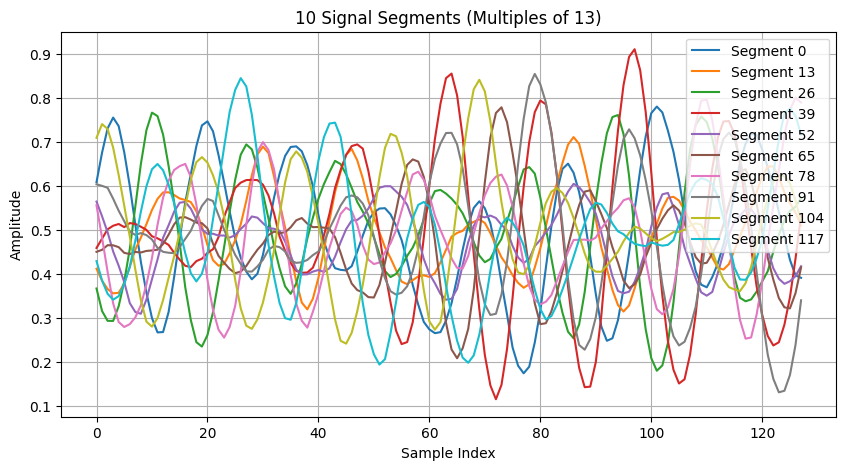

In [ ]:
df = pd.DataFrame(segments_2d)  # تبدیل آرایه به DataFrame

# انتخاب ۱۰ ردیف که شماره‌ی آن‌ها مضرب ۱۳ است
num_segments = 10
indices = range(0, num_segments * 13, 13)   # 10 مضرب 13 اول: [0, 13, 26, ..., 117]

# رنگ‌های مختلف برای نمایش نمودارها
colors = plt.cm.get_cmap("tab10", num_segments)  # استفاده از رنگ‌های آماده

# رسم نمودار
plt.figure(figsize=(10, 5))  # تنظیم اندازه‌ی نمودار
for i, idx in enumerate(indices):
    plt.plot(df.columns, df.iloc[idx], label=f"Segment {idx}", color=colors(i)) # iloc[i]= سطر iام

plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("10 Signal Segments (Multiples of 13)")
plt.legend()  # نمایش لیبل‌ها
plt.grid(True)
plt.show()


##و

In [ ]:
def mean_StandardDeviation_RMS(signal):
    mean = np.mean(signal)
    StandardDeviation = np.std(signal)
    RMS = np.sqrt(np.mean(np.square(signal)))

    return mean, StandardDeviation, RMS


In [ ]:
mean, StandardDeviation, RMS = mean_StandardDeviation_RMS(data_array)
print(f"Mean: {mean}, Standard Deviation: {StandardDeviation}, RMS: {RMS}")

Mean: 0.3960536227712893, Standard Deviation: 0.15106174935419478, RMS: 0.4238845647440022


In [ ]:
# ایجاد DataFrame با نام ستون‌ها
df = pd.DataFrame({
    "Mean": [float(mean)],
    "Std_Dev": [float(StandardDeviation)],
    "RMS": [float(RMS)]
})

#print(df)


In [ ]:
# ذخیره DataFrame در فایل CSV
df.to_csv("output.csv", index=False)


In [ ]:
#from google.colab import files
#files.download("/content/output.csv")


#II

##آ

In [ ]:
# ۱. بارگیری مجموعه داده Iris
iris = load_iris()

# ۲. تقسیم داده‌ها به آموزش (۸۰٪) و آزمون (۲۰٪)
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=63
)

# ۳. دریافت نام ویژگی‌ها
columns = iris.feature_names

# ۴. ایجاد DataFrame برای مجموعه آموزش
df_train = pd.DataFrame(X_train, columns=columns)
df_train["species"] = y_train  # اضافه کردن برچسب کلاس
df_train["dataset_type"] = "train"  # مشخص کردن داده‌های آموزش

# ۵. ایجاد DataFrame برای مجموعه آزمون
df_test = pd.DataFrame(X_test, columns=columns)
df_test["species"] = y_test  # اضافه کردن برچسب کلاس
df_test["dataset_type"] = "test"  # مشخص کردن داده‌های آزمون

# ۶. ادغام دو DataFrame
df_final = pd.concat([df_train, df_test], ignore_index=True)

# ۷. نمایش ۱۰ نمونه اول از داده‌های نهایی
print(df_final.head(150))


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  4.7               3.2                1.3               0.2   
1                  6.4               2.8                5.6               2.2   
2                  6.7               3.1                4.7               1.5   
3                  5.6               2.7                4.2               1.3   
4                  4.9               2.5                4.5               1.7   
..                 ...               ...                ...               ...   
145                4.8               3.4                1.6               0.2   
146                7.2               3.0                5.8               1.6   
147                6.2               2.8                4.8               1.8   
148                6.7               2.5                5.8               1.8   
149                5.7               2.9                4.2               1.3   

     species dataset_type  

##ب

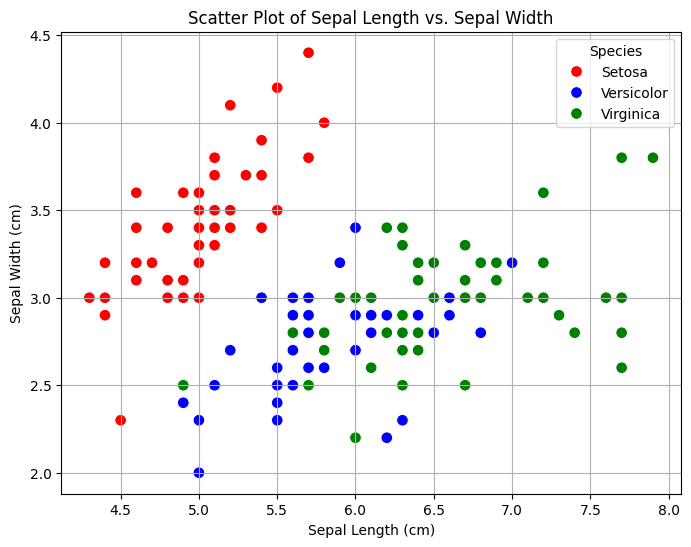

In [ ]:
# ۱. بارگیری مجموعه داده Iris
iris = load_iris()

# ۲. تبدیل داده‌ها به DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target  # اضافه کردن برچسب کلاس
df["species"] = df["species"].map({0: "Setosa", 1: "Versicolor", 2: "Virginica"})  # نامگذاری کلاس‌ها

# ۳. رسم نمودار پراکندگی (Scatter Plot)
plt.figure(figsize=(8, 6))  # تنظیم اندازه نمودار
sns.scatterplot(
    x=df["sepal length (cm)"],
    y=df["sepal width (cm)"],
    hue=df["species"],  # تفکیک رنگ‌ها بر اساس نوع گل
    palette=["red", "blue", "green"],  # رنگ‌بندی کلاس‌ها
    s=70  # تنظیم اندازه نقاط
)

# ۴. تنظیمات نمودار
plt.xlabel("Sepal Length (cm)")  # برچسب محور x
plt.ylabel("Sepal Width (cm)")  # برچسب محور y
plt.title("Scatter Plot of Sepal Length vs. Sepal Width")  # عنوان نمودار
plt.legend(title="Species")  # نمایش راهنمای رنگ‌ها
plt.grid(True)  # افزودن خطوط شبکه

# ۵. نمایش نمودار
plt.show()


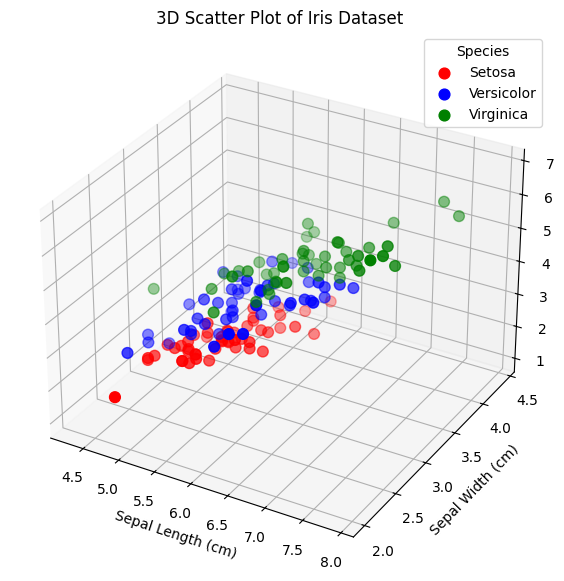

In [ ]:
# ۱. بارگیری مجموعه داده Iris
iris = load_iris()

# ۲. تبدیل داده‌ها به DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target  # اضافه کردن برچسب کلاس
df["species"] = df["species"].map({0: "Setosa", 1: "Versicolor", 2: "Virginica"})  # نامگذاری کلاس‌ها

# ۳. تعریف رنگ‌های هر کلاس
colors = {"Setosa": "red", "Versicolor": "blue", "Virginica": "green"}

# ۴. ایجاد نمودار سه‌بعدی
fig = plt.figure(figsize=(10, 7))  # تنظیم اندازه نمودار
ax = fig.add_subplot(111, projection="3d")  # افزودن محور سه‌بعدی

# ۵. رسم نقاط برای هر کلاس به‌صورت جداگانه
for species, color in colors.items():
    subset = df[df["species"] == species]  # فیلتر کردن داده‌ها بر اساس نوع گل
    ax.scatter(
        subset["sepal length (cm)"],
        subset["sepal width (cm)"],
        subset["petal length (cm)"],
        label=species,
        color=color,
        s=60  # تنظیم اندازه نقاط
    )

# ۶. تنظیم برچسب محور‌ها
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Sepal Width (cm)")
ax.set_zlabel("Petal Length (cm)")
ax.set_title("3D Scatter Plot of Iris Dataset")

# ۷. نمایش راهنمای کلاس‌ها
ax.legend(title="Species")

# ۸. نمایش نمودار
plt.show()


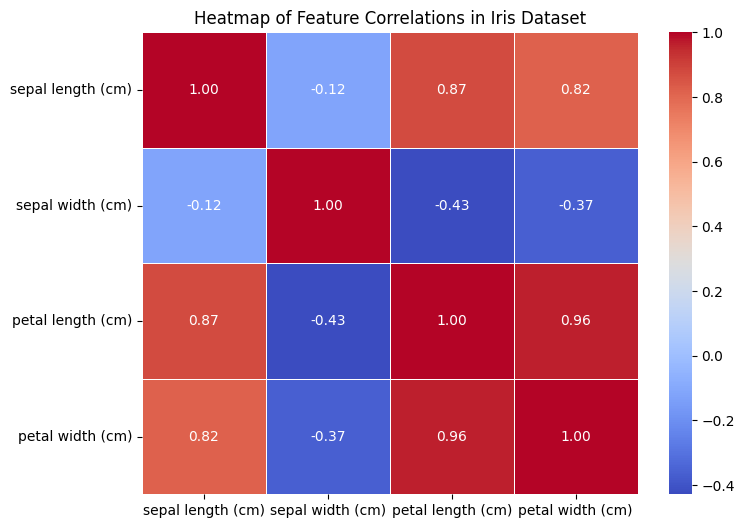

In [ ]:
# ۱. بارگیری مجموعه داده Iris
iris = load_iris()

# ۲. تبدیل داده‌ها به DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# ۳. محاسبه‌ی ماتریس همبستگی (Correlation Matrix)
correlation_matrix = df.corr()

# ۴. رسم نقشه‌ی حرارتی با Seaborn
plt.figure(figsize=(8, 6))  # تنظیم اندازه نمودار
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# ۵. تنظیمات نمودار
plt.title("Heatmap of Feature Correlations in Iris Dataset")  # عنوان نمودار

# ۶. نمایش نقشه‌ی حرارتی
plt.show()


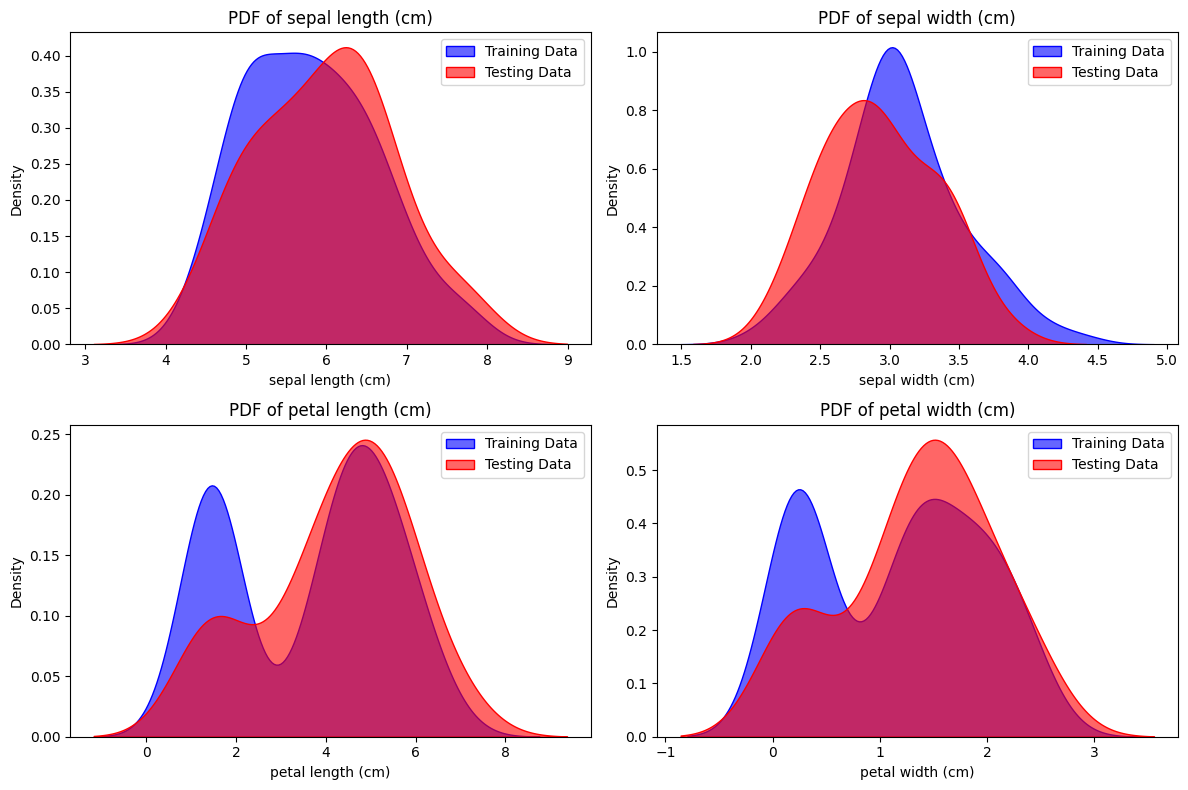

In [ ]:
# 1. Load the Iris dataset
iris = load_iris()

# 2. Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target  # Add species column

# 3. Split the dataset into training (80%) and testing (20%) sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=63)

# 4. Plot the probability density function (PDF) for each feature
plt.figure(figsize=(12, 8))  # Set the figure size

for i, feature in enumerate(df.columns[:-1]):  # Exclude the 'species' column
    plt.subplot(2, 2, i + 1)  # Create subplots (2 rows, 2 columns)

    # Plot training data distribution
    sns.kdeplot(train_df[feature], label="Training Data", fill=True, alpha=0.6, color="blue")

    # Plot testing data distribution
    sns.kdeplot(test_df[feature], label="Testing Data", fill=True, alpha=0.6, color="red")

    # Set titles and labels
    plt.title(f"PDF of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()

# 5. Display the plots
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


##ج

In [ ]:
# 1. Load the Iris dataset
iris = load_iris()

# 2. Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 3. Select a numerical feature (sepal length) and discretize it into 3 categories
df["sepal_length_category"] = pd.cut(
    df["sepal length (cm)"],  # The continuous feature
    bins=3,  # Divide into 3 bins
    labels=["Short", "Medium", "Tall"]  # Assign labels to each bin
)

# 4. Display the first few rows to check the new column
print(df[["sepal length (cm)", "sepal_length_category"]].head())


   sepal length (cm) sepal_length_category
0                5.1                 Short
1                4.9                 Short
2                4.7                 Short
3                4.6                 Short
4                5.0                 Short


##د

In [ ]:
# 1. Load the Iris dataset
iris = load_iris()

# 2. Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target  # Add species column
df["species"] = df["species"].map({0: "Setosa", 1: "Versicolor", 2: "Virginica"})  # Map target values to class names

# 3. Filter only the Setosa class
setosa_df = df[df["species"] == "Setosa"]

# 4. Get statistical description of the Setosa class
setosa_stats = setosa_df.describe()

# 5. Display the result
print(setosa_stats)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  
count         50.000000  
mean           0.246000  
std            0.105386  
min            0.100000  
25%            0.200000  
50%            0.200000  
75%            0.300000  
max            0.600000  
